# Exercise 2

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interactive

import pandas as pd
import numpy as np
import sympy as sp
import scipy.stats as stats

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

## 1 Plot the data to check which type of distributions
Assume that we have a set of observations x1, x2, … , xn. Before we estimate any parameters, we must convince ourselves that the observations originate from the right family of distributions, e.g. normal, Gumbel, or Weibull. One way to get a rough idea, about which family of distributions may be suitable, is to display the observations in a probability plot. If you suspect that the data originate from, for instance, a normal distribution, then you should make a normal probability plot; if you instead suspect a Gumbel distribution, and then make a Gumbel probability plot. If, in the plot, the observations seem to line up well along a straight line, it indicates that the chosen distribution for the probability plot indeed might serve as a good model for the observations. 
Statistics Toolbox provides normplot (for normal distribution), weibplot (for Weibull distribution); the WAFO toolbox furnishes you with wgumbplot (for Gumbel distribution). Acquaint yourself with the above-mentioned commands, for example


In [3]:
rv = stats.norm(loc=0, scale=1)

In [4]:
dat1=rv.rvs(size=2000) # sgenerate normal random variable, referred later on.

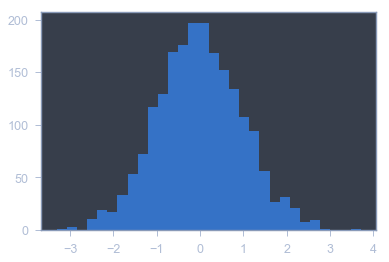

In [5]:
fig,ax=plt.subplots()
ax.hist(dat1, bins=30);

## Probability plots

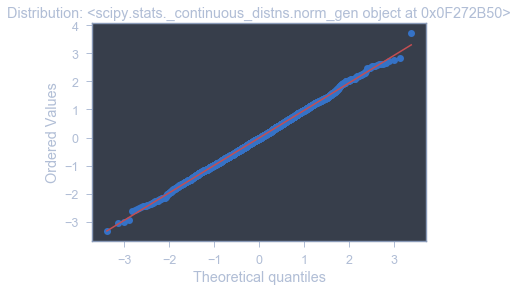

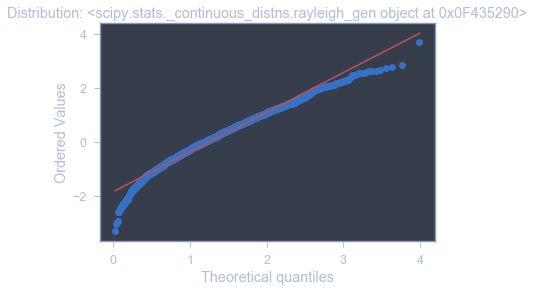

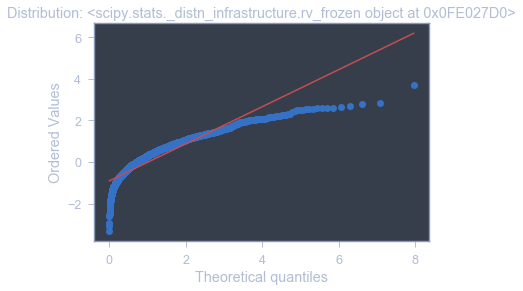

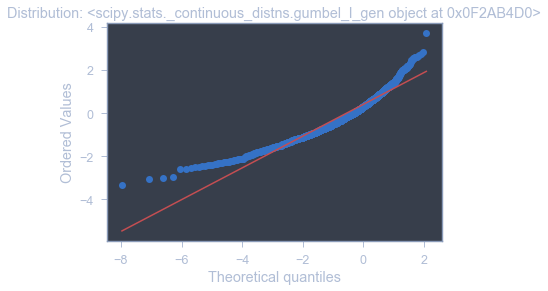

In [6]:
def plot_probability_plots(x):
    dists = [stats.norm, stats.rayleigh, stats.exponweib(1,1), stats.gumbel_l]
    
    for dist in dists:
        fig,ax=plt.subplots()
        stats.probplot(x=x, dist=dist,plot=ax);
        ax.set_title('Distribution: %s' %dist)

plot_probability_plots(x=dat1)

## Central Limit Theorem

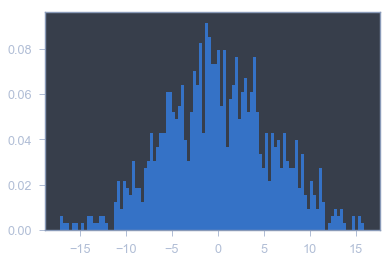

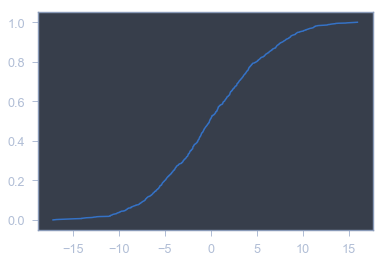

In [7]:
N_samples=1000
N_sample=10000
rv = stats.uniform(-1000,2000)

ys = []
for i in range(N_samples):

    xs = rv.rvs(size=N_sample)
    y = np.mean(xs)
    ys.append(y)

fig,ax=plt.subplots()
ax.hist(ys, bins=1+int(N_samples/10), density=True);

fig,ax=plt.subplots()
values=np.sort(ys)
density=np.linspace(0,1,len(ys))
ax.plot(values, density)


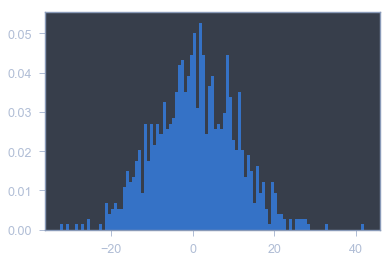

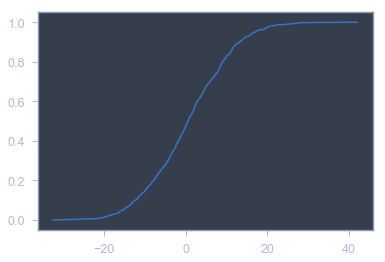

In [8]:
N_samples=1000
N_sample=10000
rv = stats.norm(0,1000)

ys = []
for i in range(N_samples):

    xs = rv.rvs(size=N_sample)
    y = np.mean(xs)
    ys.append(y)

fig,ax=plt.subplots()
ax.hist(ys, bins=1+int(N_samples/10), density=True);

fig,ax=plt.subplots()
values=np.sort(ys)
density=np.linspace(0,1,len(ys))
ax.plot(values, density)

## 4.1 Check the distribution type of measured stress signal
In the data “stress.dat”, the measure frequency is 2.5 Hz, i.e. time interval between two measurement points is 0.4 seconds. Load the data and check the distribution types of the stress signal, the distribution types of the local maxima (minima), the rainflow stress ranges, the assumed “yearly” maxima of the signal, using the probability plotting papers. Several probabilities papers are available in wafo toolbox. They are briefly introduced below (it will be further discussed in the next exercise.

In [9]:
s = np.loadtxt(r'../Computer Exercise Data/stress.dat')   
time = pd.Series(np.arange(0,0.4*(len(s)), 0.4), name='time')
stress = pd.Series(data=s, name='stress', index=time)

stress.head()

time
0.0    86.250191
0.4    85.743660
0.8    80.187477
1.2    73.027451
1.6    69.349892
Name: stress, dtype: float64

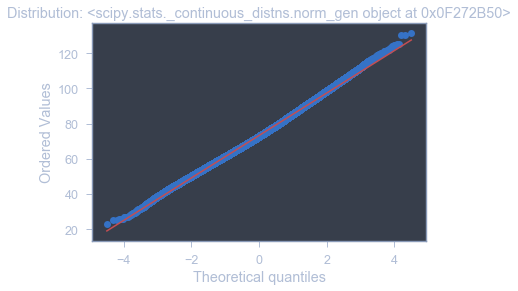

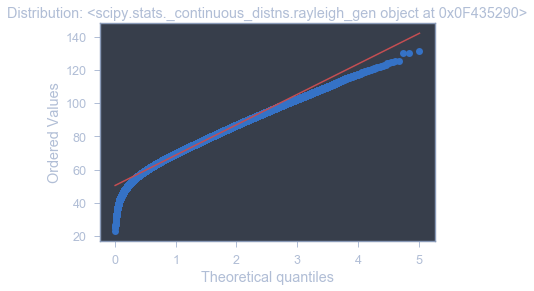

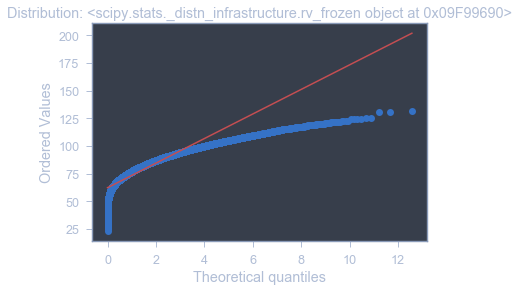

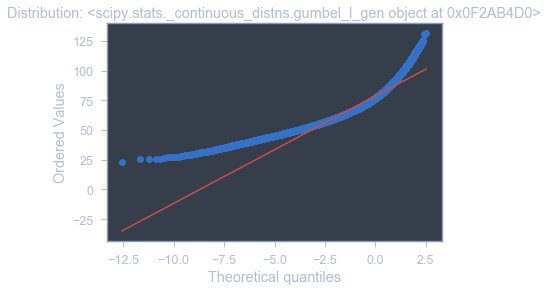

In [10]:
plot_probability_plots(x=stress)

### 4.2 Distributions for regression and inference test
Standard normal distribution is the basis for the hypothesis test. The other distributions for the test are actually related with the standard normal distributions. Instead of investigating the hypothesis test, you will be asked to compute the 95% confidence intervals of random variables from these distributions.

In [11]:
rv = stats.norm(loc=0, scale=1)

rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

### 1.1 Measurements of significant wave height Hs in the Atlantic Ocean
In oceanography and marine technology, statistical extreme-value theory has been used to a great extent. In design of offshore structures knowledge about “extreme” condition is important.
In the numerical examples above, we used artificial data, simulated from a distribution which we could control. We will now consider real measurements from the Atlantic Ocean. The data set contains so-called significant wave heights. 


In [12]:
a = np.loadtxt(r'../Computer Exercise Data/atlantic.dat')   
Hs = pd.Series(data=s, name='Hs')

Hs.describe()

count    200001.000000
mean         73.306110
std          12.066720
min          23.098738
25%          65.043510
50%          72.805901
75%          81.190895
max         131.341080
Name: Hs, dtype: float64

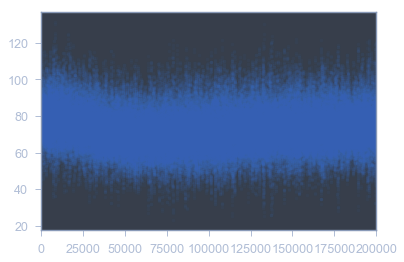

In [123]:
fig,ax=plt.subplots()
Hs.plot(ax=ax, style='.', alpha=0.05)

Text(0.5, 1.0, 'Distribution: lognorm')

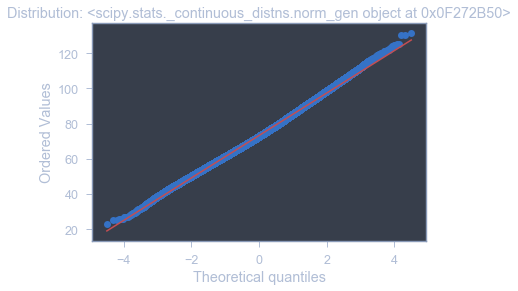

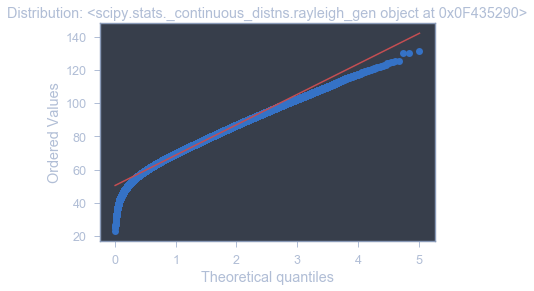

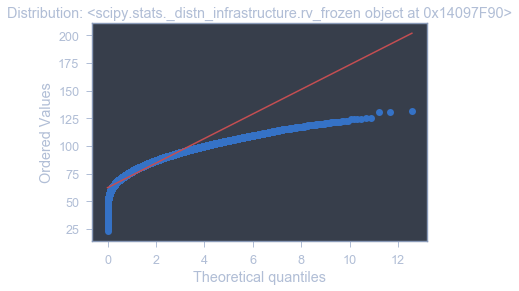

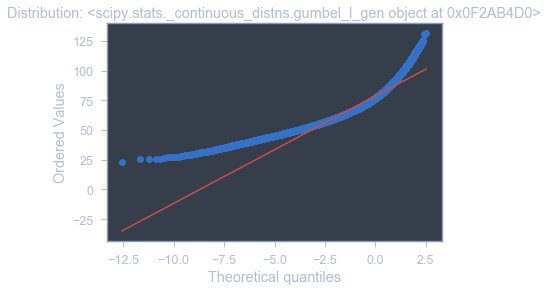

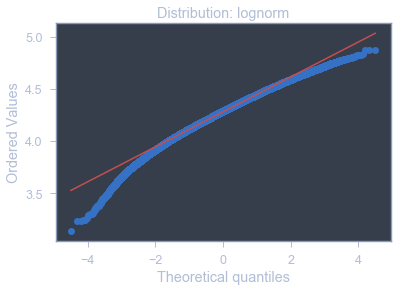

In [14]:
plot_probability_plots(x=Hs)
fig,ax=plt.subplots()
stats.probplot(x=np.log(Hs), dist=stats.norm,plot=ax);
ax.set_title('Distribution: lognorm')

## Maximum likelihood method to fitting the probability distribution
Since the normal distribution is quite well recognized and systematically studied in the course lectures, in this section, we will use the Gumbel distribution, which is often used for extreme prediction, for an example to illustrate the method of maximum likelihood method. You will also be given some hints to use the method for fitting the Rayleigh and Weibull distribution (often for fatigue problems) by yourself.
Assume that we have a set of observations x1, x2, … , xn, from (for example) a Gumbel distribution, i.e. the cumulative distribution function (cdf) is


In [15]:
x,mu,beta = sp.symbols('x mu beta')
F = sp.Function('F')(x)
f = sp.Function('f')(x)

gumbel_cdf=sp.Eq(F,sp.exp(-sp.exp(-(x-mu)/beta)))
gumbel_cdf

Eq(F(x), exp(-exp((mu - x)/beta)))

In [52]:
gumbel_pdf = sp.Eq(f,gumbel_cdf.rhs.diff(x,1)).simplify()
gumbel_pdf

Eq(f(x), exp(-exp((mu - x)/beta) + (mu - x)/beta)/beta)

In [78]:
log_gumbel_pdf = sp.Eq(sp.log(f),sp.expand_log(sp.ln(gumbel_pdf.rhs), force=True))
log_gumbel_pdf

Eq(log(f(x)), -exp((mu - x)/beta) - log(beta) + (mu - x)/beta)

In [79]:
x_1,x_2 = sp.symbols('x_1 x_2')

In [130]:
log_gumbel_pdf_2x=(log_gumbel_pdf.rhs.subs(x,x_1)+log_gumbel_pdf.rhs.subs(x,x_2)).simplify()
log_gumbel_pdf_2x

(-beta*(exp((mu - x_1)/beta) + exp((mu - x_2)/beta) + 2*log(beta)) + 2*mu - x_1 - x_2)/beta

In [137]:
diff_mu = log_gumbel_pdf_2x.diff(mu).simplify()
diff_mu2=diff_mu*beta
diff_mu2

-exp((mu - x_1)/beta) - exp((mu - x_2)/beta) + 2

In [140]:
diff_beta = log_gumbel_pdf_2x.diff(beta).simplify()
diff_beta2 = diff_beta*beta**2
diff_beta2

-2*beta + mu*exp((mu - x_1)/beta) + mu*exp((mu - x_2)/beta) - 2*mu - x_1*exp((mu - x_1)/beta) + x_1 - x_2*exp((mu - x_2)/beta) + x_2

In [141]:
mu_diff_equation = sp.Eq(diff_mu2,0)
mu_diff_equation

Eq(-exp((mu - x_1)/beta) - exp((mu - x_2)/beta) + 2, 0)

In [149]:
mu_hat=sp.symbols('mu_hat')
mu_hat_equation = sp.Eq(mu_hat,sp.solve(mu_diff_equation, mu)[0])
mu_hat_equation

Eq(mu_hat, beta*log(2*exp((x_1 + x_2)/beta)/(exp(x_1/beta) + exp(x_2/beta))))

In [150]:
beta_diff_equation = sp.Eq(diff_beta2,0)
beta_diff_equation.simplify()

Eq(2*beta - mu*exp((mu - x_1)/beta) - mu*exp((mu - x_2)/beta) + 2*mu + x_1*exp((mu - x_1)/beta) - x_1 + x_2*exp((mu - x_2)/beta) - x_2, 0)

In [156]:
beta_diff_equation2 = beta_diff_equation.subs(mu,sp.solve(mu_hat_equation, mu_hat)[0]).simplify()
beta_diff_equation2

Eq((-2*beta*exp(x_1/beta) - 2*beta*exp(x_2/beta) + x_1*exp(x_1/beta) - x_1*exp(x_2/beta) - x_2*exp(x_1/beta) + x_2*exp(x_2/beta))/(exp(x_1/beta) + exp(x_2/beta)), 0)

In [168]:
type(beta_diff_equation2.lhs)

sympy.core.mul.Mul

In [174]:
beta_diff_equation3 = sp.Eq(beta_diff_equation2.lhs.as_two_terms()[1],0)
beta_diff_equation3

Eq(-2*beta*exp(x_1/beta) - 2*beta*exp(x_2/beta) + x_1*exp(x_1/beta) - x_1*exp(x_2/beta) - x_2*exp(x_1/beta) + x_2*exp(x_2/beta), 0)

In [175]:
sp.solve(beta_diff_equation3, beta)

NotImplementedError: multiple generators [beta, exp(x_1/beta), exp(x_2/beta)]
No algorithms are implemented to solve equation -2*beta*exp(x_1/beta) - 2*beta*exp(x_2/beta) + x_1*exp(x_1/beta) - x_1*exp(x_2/beta) - x_2*exp(x_1/beta) + x_2*exp(x_2/beta) + 0